# X Education Online Case Study

## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

Lead Conversion Process - Demonstrated as a funnel
Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

 

## Step 1 : Reading and Understanding the Data 

    Let us first import library and read the Bikesharing dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Reading Education data set
Education = pd.read_csv("Leads.csv")
Education.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
pd.set_option('display.max_columns', None) #we using this code for display all columns
Education.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
Education.shape

(9240, 37)

In [6]:
# checking all columns data type, how many rows or columns in Education data set.
Education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Checking the null values
round(Education.isnull().sum()/len(Education)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

## Step 2:  Data Cleaning and Handling

In [8]:
# First of Delecting first two columns "Prospect ID" and "Lead Number" . Because this is not useful our case study 

Education.drop(["Prospect ID","Lead Number"],axis =1,inplace = True)

Education.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
# Deleting those columns which columns have more then 25% null values in Education data set.
Education.drop(["Country","What is your current occupation","What matters most to you in choosing a course",
               "Tags","Lead Quality","Lead Profile","Asymmetrique Activity Index","Asymmetrique Profile Index",
               "Asymmetrique Activity Score","Asymmetrique Profile Score"],axis =1,inplace = True)

In [10]:
Education.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Select,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Select,No,No,No,No,No,No,No,No,No,No,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Select,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Other,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


In [11]:
# Again Checking the null values
round(Education.isnull().sum()/len(Education)*100,2)

Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Specialization                              15.56
How did you hear about X Education          23.89
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00
Receive More Updates About Our Courses       0.00
Update me on Supply Chain Content            0.00


In [12]:
# Now Checking the remaining null values columns individually
Education["Lead Source"].isnull().sum()

36

In [13]:
# Now I am Deleting the  null value rows of lead source column
Education.dropna(subset = ["Lead Source"] , axis = 0, inplace = True)

In [14]:
# Now we verifying the null values deleted or not ?
Education["Lead Source"].isnull().sum()

0

In [15]:
# Now checking the TotalVisits columns null value and treating them 
Education.TotalVisits.value_counts()

0.0      2161
2.0      1679
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [16]:
# We replacing null values with mode in column TotalVisit
TotalVisit_mode = Education.TotalVisits.mode()[0]

Education.TotalVisits = Education.TotalVisits.fillna(TotalVisit_mode)

In [17]:
Education["TotalVisits"].isnull().sum()

0

In [18]:
# Now we converting TotalVisits columns data type float to integer
Education["TotalVisits"] = Education["TotalVisits"].astype(int)
Education["TotalVisits"].dtype

dtype('int32')

In [19]:
#Check the nulls in the entire dataframe again
Education.isnull().sum()

Lead Origin                                    0
Lead Source                                    0
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
TotalVisits                                    0
Total Time Spent on Website                    0
Page Views Per Visit                         130
Last Activity                                101
Specialization                              1438
How did you hear about X Education          2207
Search                                         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisement                          0
Through Recommendations                        0
Receive More Updates About Our Courses         0
Update me on Supply Chain Content              0
Get updates on DM Co

In [20]:
# Now checking the "Page Views Per Visit" columns null value and treating them 

Education["Page Views Per Visit"].value_counts()

0.00    2161
2.00    1794
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [21]:
# We replacing null values with mode in column TotalVisit
pageviewvisit_mode = Education["Page Views Per Visit"].mode()[0]
Education["Page Views Per Visit"] = Education["Page Views Per Visit"].fillna(pageviewvisit_mode)

In [22]:
Education["Page Views Per Visit"].isnull().sum()

0

In [23]:
# Now we converting TotalVisits columns data type float to integer
Education["Page Views Per Visit"] = Education["Page Views Per Visit"].astype(int)
Education["Page Views Per Visit"].dtype

dtype('int32')

In [24]:
# Now checking the "Last Activity" columns null value and treating them 
Education["Last Activity"].value_counts()

Email Opened                    3432
SMS Sent                        2723
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    321
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      59
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [25]:
# Now I am Deleting the  null value rows of "Last Activity" column . Here I am not using mode function because i am thinking this 
# column is useful.
Education.dropna(subset = ["Last Activity"] , axis = 0, inplace = True) 

In [26]:
# Now we verifying the null values deleted or not ?
Education["Last Activity"].isnull().sum()

0

In [27]:
#Check the nulls in the entire dataframe again
round(Education.isnull().sum()/len(Education)*100,2)

Lead Origin                                  0.00
Lead Source                                  0.00
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  0.00
Total Time Spent on Website                  0.00
Page Views Per Visit                         0.00
Last Activity                                0.00
Specialization                              15.80
How did you hear about X Education          24.24
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00
Receive More Updates About Our Courses       0.00
Update me on Supply Chain Content            0.00


In [28]:
# Now checking the "Last Activity" columns null value and treating them 
Education["Specialization"].value_counts()

Select                               1862
Finance Management                    963
Human Resource Management             838
Marketing Management                  824
Operations Management                 499
Business Administration               402
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                178
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [29]:
# In the Specialization Columns 'select' category number is the more that means customer has not fill this column beacuse this is 
# showing customer work Specialization. so thats why I am deleting this column

Education.drop(["Specialization"],axis = 1 , inplace = True)

In [30]:
# Now checking the "How did you hear about X Education" columns null value and treating them 
Education["How did you hear about X Education"].value_counts()

Select                   4908
Online Search             808
Word Of Mouth             347
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               66
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [31]:
# I am thinking this category useful for companys advertisment so i am not deleting this column . So ,I am replaceing null values to mode

Education["How did you hear about X Education"] = Education["How did you hear about X Education"].fillna(Education["How did you hear about X Education"].mode()[0])

In [32]:
# Now we verifying the null values deleted or not ?
Education["How did you hear about X Education"].isnull().sum()

0

In [33]:
# Now checking the "How did you hear about X Education" columns null value and treating them 
Education["City"].value_counts()

Mumbai                         3184
Select                         2169
Thane & Outskirts               748
Other Cities                    680
Other Cities of Maharashtra     450
Other Metro Cities              378
Tier II Cities                   74
Name: City, dtype: int64

In [34]:
# I am thinking this category useful for companys advertisment so i am not deleting this column . So ,I am replaceing null 
# values to 'select' category

Education["City"] = Education["City"].fillna(Education["City"].mode()[0])


In [35]:
# Now we verifying the null values deleted or not ?
Education["How did you hear about X Education"].isnull().sum()

0

In [36]:
#Check the nulls in the entire dataframe again
round(Education.isnull().sum()/len(Education)*100,2)

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
How did you hear about X Education          0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content                   0.0
City                                    

In [37]:
Education.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Lead Origin                               9103 non-null   object
 1   Lead Source                               9103 non-null   object
 2   Do Not Email                              9103 non-null   object
 3   Do Not Call                               9103 non-null   object
 4   Converted                                 9103 non-null   int64 
 5   TotalVisits                               9103 non-null   int32 
 6   Total Time Spent on Website               9103 non-null   int64 
 7   Page Views Per Visit                      9103 non-null   int32 
 8   Last Activity                             9103 non-null   object
 9   How did you hear about X Education        9103 non-null   object
 10  Search                                    9103 n

In [38]:
# We reading the our main data again
Education.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,How did you hear about X Education,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0,0,0,Page Visited on Website,Select,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified
1,API,Organic Search,No,No,0,5,674,2,Email Opened,Select,No,No,No,No,No,No,No,No,No,No,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2,1532,2,Email Opened,Select,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1,305,1,Unreachable,Word Of Mouth,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2,1428,1,Converted to Lead,Other,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


## Step 3: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [39]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
           'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
           'I agree to pay the amount through cheque','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
Education[varlist] = Education[varlist].apply(binary_map)

In [40]:
Education.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,How did you hear about X Education,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0,0,0,Page Visited on Website,Select,0,0,0,0,0,0,0,0,0,0,Select,0,0,Modified
1,API,Organic Search,0,0,0,5,674,2,Email Opened,Select,0,0,0,0,0,0,0,0,0,0,Select,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2,1532,2,Email Opened,Select,0,0,0,0,0,0,0,0,0,0,Mumbai,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1,305,1,Unreachable,Word Of Mouth,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2,1428,1,Converted to Lead,Other,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0,Modified


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [41]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(Education[['Lead Origin', 'Lead Source', 'Last Activity', 'How did you hear about X Education',
                                  'City','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
Education = pd.concat([Education, dummy1], axis=1)

In [42]:
Education.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,How did you hear about X Education,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0,0,0,Page Visited on Website,Select,0,0,0,0,0,0,0,0,0,0,Select,0,0,Modified,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5,674,2,Email Opened,Select,0,0,0,0,0,0,0,0,0,0,Select,0,0,Email Opened,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2,1532,2,Email Opened,Select,0,0,0,0,0,0,0,0,0,0,Mumbai,0,1,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1,305,1,Unreachable,Word Of Mouth,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2,1428,1,Converted to Lead,Other,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


#### Dropping the repeated variables

In [43]:
# We have created dummies for the below variables, so we can drop them
Education = Education.drop(['Lead Origin','Lead Source','Last Activity','How did you hear about X Education','City',
                            'Last Notable Activity'], 1)

In [44]:
Education.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5,674,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2,1532,2,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,305,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2,1428,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [45]:
Education.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 87 columns):
 #   Column                                                    Non-Null Count  Dtype
---  ------                                                    --------------  -----
 0   Do Not Email                                              9103 non-null   int64
 1   Do Not Call                                               9103 non-null   int64
 2   Converted                                                 9103 non-null   int64
 3   TotalVisits                                               9103 non-null   int32
 4   Total Time Spent on Website                               9103 non-null   int64
 5   Page Views Per Visit                                      9103 non-null   int32
 6   Search                                                    9103 non-null   int64
 7   Magazine                                                  9103 non-null   int64
 8   Newspaper Article                     

==> Now you can see that you have all variables as numeric

#### Checking for Outliers 

In [46]:
# Checking for outliers in the continuous variables
num_Education = Education[['Total Time Spent on Website','Page Views Per Visit']]

In [47]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_Education.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000
mean,483.773921,2.293420
std,545.519186,2.165968
min,0.000000,0.000000
25%,12.000000,1.000000
50%,247.000000,2.000000
75%,924.000000,3.000000
90%,1375.000000,5.000000
95%,1557.000000,6.000000
99%,1839.000000,9.000000


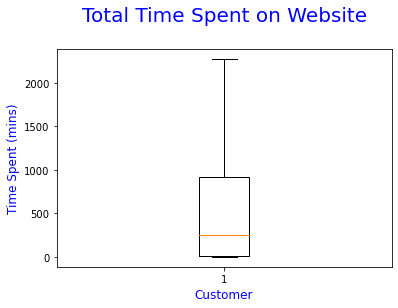

In [48]:
#Create a box plot for the 'Total Time Spent on Website' column
plt.boxplot(num_Education['Total Time Spent on Website'])

# Adding and formatting title
plt.title('Total Time Spent on Website\n',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})

# Labeling Axes
plt.xlabel("Customer", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.ylabel("Time Spent (mins)", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.show()

👉We clearly seen that in 'Total Time Spent on Website' has no outliers😊

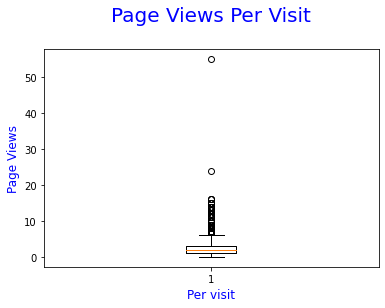

In [49]:
#Create a box plot for the Page Views Per Visit column
plt.boxplot(num_Education['Page Views Per Visit'])

# Adding and formatting title
plt.title('Page Views Per Visit\n',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})

# Labeling Axes
plt.xlabel("Per visit", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.ylabel("Page Views", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.show()

➡️Now we can see that in the 'Page Views Per Visit' has outliers 😔

In [50]:
# clean the 'Page Views Per Visit' columns
Education = Education[Education['Page Views Per Visit'] < 20]

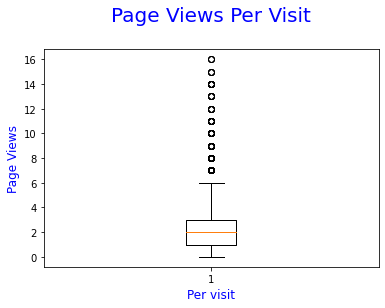

In [51]:
#Create again a box plot for the Page Views Per Visit column
plt.boxplot(Education['Page Views Per Visit'])

# Adding and formatting title
plt.title('Page Views Per Visit\n',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})

# Labeling Axes
plt.xlabel("Per visit", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.ylabel("Page Views", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.show()

In [52]:
# Now again clean the 'Page Views Per Visit' columns 
Education = Education[Education['Page Views Per Visit'] < 6]

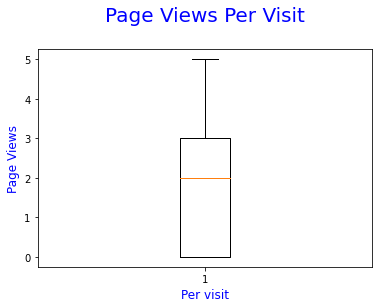

In [53]:
#Create again a box plot for the Page Views Per Visit column
plt.boxplot(Education['Page Views Per Visit'])

# Adding and formatting title
plt.title('Page Views Per Visit\n',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})

# Labeling Axes
plt.xlabel("Per visit", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.ylabel("Page Views", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.show()

➡️ Now we Clearly see that here 'Page Views Per Visit' columns has no outliers 😊😊

In [54]:
# Checking for Missing Values and Inputing Them
Education.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8499 entries, 0 to 9239
Data columns (total 87 columns):
 #   Column                                                    Non-Null Count  Dtype
---  ------                                                    --------------  -----
 0   Do Not Email                                              8499 non-null   int64
 1   Do Not Call                                               8499 non-null   int64
 2   Converted                                                 8499 non-null   int64
 3   TotalVisits                                               8499 non-null   int32
 4   Total Time Spent on Website                               8499 non-null   int64
 5   Page Views Per Visit                                      8499 non-null   int32
 6   Search                                                    8499 non-null   int64
 7   Magazine                                                  8499 non-null   int64
 8   Newspaper Article                     

👉👉 Now we don't have any null value in Education Data Frame

# 🎄Step 4: Test-Train Split

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
# Putting feature variable to X
X = Education.drop(['Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5,674,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2,1532,2,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,305,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2,1428,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [57]:
# Putting response variable to y
y = Education['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [58]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# 🎄Step 5: Feature Scaling

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7240,0,0,2.086440,1.568235,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5076,0,0,-0.914148,-0.873024,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5160,0,0,-0.013971,0.882322,3,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
873,1,0,-0.314030,-0.325400,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6450,0,0,-0.013971,1.525826,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [61]:
### Checking the converted Rate
converted = (sum(Education['Converted'])/len(Education['Converted'].index))*100
converted

38.016237204376985

We have almost 38% converted rate

# 🎄Step 6: Model Building

Let's start by splitting our data into a training set and a test set.

#### 🌴🌳Running Your First Training Model

In [62]:
import statsmodels.api as sm

In [63]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5949
Model:                            GLM   Df Residuals:                     5879
Model Family:                Binomial   Df Model:                           69
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 23 Jan 2023   Deviance:                   1.4681e+05
Time:                        16:30:21   Pearson chi2:                 7.18e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                     1.781e+15   1.03e+08   1.72e+07      0.000    1.78e+15    1.78e+15
Do Not Email                                             -1.141e+15   4.71e+06  -2.42e+08      0.000   -1.14e+15   -1.14e+15
Do Not Call                                               5.066e+15   6.76e+07   7.49e+07      0.000    5.07e+15    5.07e+15
TotalVisits                                               9.536e+13   1.16e+06   8.25e+07      0.000    9.54e+13    9.54e+13
Total Time Spent on Website                               1.088e+14   1.01e+06   1.08e+08      0.000    1.09e+14    1.09e+14
Page Views Per Visit                                     -5.766e+13   9.42e+05  -6.12e+07      0.000   -5.77e+13   -5.77e+13
Search                                                    3.172e+14   2.39e+07   1.33e+07      0.000    3.17e+14    3.17e+14
Magazine                                                     3.2911   3.43e-07   9.59e+06      0.000       3.291       3.291
Newspaper Article                                           62.3425   7.73e-07   8.07e+07      0.000      62.342      62.342
X Education Forums                                         -11.7844   5.68e-07  -2.08e+07      0.000     -11.784     -11.784
Newspaper                                                -4.511e+15   6.73e+07   -6.7e+07      0.000   -4.51e+15   -4.51e+15
Digital Advertisement                                     8.828e+13   4.77e+07   1.85e+06      0.000    8.83e+13    8.83e+13
Through Recommendations                                   2.241e+15   3.56e+07   6.29e+07      0.000    2.24e+15    2.24e+15
Receive More Updates About Our Courses                     -18.9052   4.94e-07  -3.83e+07      0.000     -18.905     -18.905
Update me on Supply Chain Content                           27.1998   4.99e-07   5.45e+07      0.000      27.200      27.200
Get updates on DM Content                                   29.7097   4.95e-07      6e+07      0.000      29.710      29.710
I agree to pay the amount through cheque                   -13.5102   2.53e-07  -5.34e+07      0.000     -13.510     -13.510
A free copy of Mastering The Interview                    1.022e+13   3.39e+06   3.01e+06      0.000    1.02e+13    1.02e+13
Lead Origin_Landing Page Submission                      -6.528e+13   4.01e+06  -1.63e+07      0.000   -6.53e+13   -6.53e+13
Lead Origin_Lead Add Form                                 4.668e+15   6.73e+07   6.94e+07      0.000    4.67e+15    4.67e+15
Lead Origin_Lead Import                                   1.482e+15   3.94e+07   3.76e+07      0.000    1.48e+15    1.48e+15
Lead Source_Direct Traffic                                2.365e+15   7.77e+07   3.

In [64]:
# Now here we can see that "Last Notable Activity_Resubscribed to emails" and "Last Notable Activity_View in browser link Clicked"
# has P-Value 'nan' so we deleting this columns
Education = Education.drop(['Last Notable Activity_Resubscribed to emails','Last Notable Activity_View in browser link Clicked'],axis = 1,
                           inplace = True)

# 🎄Step 7: Feature Selection Using RFE

In [65]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [66]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select= 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [67]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False,  True,  True,  True, False])

In [68]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 15),
 ('TotalVisits', False, 35),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 42),
 ('Search', False, 50),
 ('Magazine', False, 55),
 ('Newspaper Article', False, 53),
 ('X Education Forums', False, 56),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 52),
 ('Through Recommendations', True, 1),
 ('Receive More Updates About Our Courses', False, 59),
 ('Update me on Supply Chain Content', False, 60),
 ('Get updates on DM Content', False, 63),
 ('I agree to pay the amount through cheque', False, 65),
 ('A free copy of Mastering The Interview', False, 47),
 ('Lead Origin_Landing Page Submission', False, 46),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 19),
 ('Lead Source_Facebook', False, 34),
 ('Lead Source_Google', False, 24),
 ('Lead Source_Live Chat', False, 48),
 ('Lead Source_NC_EDM', False, 57),
 ('Lead Source_Olar

In [69]:
col = X_train.columns[rfe.support_]

In [70]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums',
       'Digital Advertisement', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       '

##### 🌳 Assessing the model with StatsModels

In [71]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5949
Model:                            GLM   Df Residuals:                     5928
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2585.3
Date:                Mon, 23 Jan 2023   Deviance:                       5170.5
Time:                        16:30:31   Pearson chi2:                 6.09e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3651
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.2612      0.053    -23.628      0.000      -1.366      -1.157
Do Not Email                                      -1.8468      0.194     -9.510      0.000      -2.227      -1.466
Total Time Spent on Website                        1.1412      0.041     27.842      0.000       1.061       1.221
Newspaper                                        -23.1213   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Through Recommendations                            2.2736      1.273      1.786      0.074      -0.221       4.768
Lead Origin_Lead Add Form                          3.1519      1.165      2.705      0.007       0.868       5.436
Lead Origin_Lead Import                            0.9693      0.460      2.107      0.035       0.067       1.871
Lead Source_Olark Chat                             1.1782      0.103     11.491      0.000       0.977       1.379
Lead Source_Reference                              1.1591      1.184      0.979      0.328      -1.162       3.480
Lead Source_Welingak Website                       2.7395      1.373      1.996      0.046       0.049       5.430
Last Activity_Converted to Lead                   -0.9473      0.194     -4.883      0.000      -1.328      -0.567
Last Activity_Email Received                      21.7676      2e+04      0.001      0.999   -3.92e+04    3.93e+04
Last Activity_Olark Chat Conversation             -1.5404      0.163     -9.436      0.000      -1.860      -1.220
Last Activity_Unreachable                         -1.2255      0.517     -2.369      0.018      -2.239      -0.212
How did you hear about X Education_Email           1.8044      0.649      2.781      0.005       0.533       3.076
How did you hear about X Education_SMS            -1.3542      0.738     -1.836      0.066      -2.800       0.092
Last Notable Activity_Email Link Clicked          -0.6451      0.272     -2.369      0.018      -1.179      -0.111
Last Notable Activity_Had a Phone Conversation     2.1715      1.170      1.855      0.064      -0.122       4.465
Last Notable Activity_SMS Sent                     1.6236      0.082     19.825      0.000       1.463       1.784
Last Notable Activity_Unreachable                  3.4028      0.760      4.476      0.000       1.913       4.893
Last Notable Activity_Unsubscribed                 1.8726      0.503      3.721      0.000       0.886       2.859
==================================================================================================================
"""

In [72]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:15]

7240    0.895855
5076    0.632810
5160    0.797261
873     0.029907
6450    0.891253
2047    0.253646
3286    0.974269
9026    0.871351
6227    0.067886
7241    0.042438
1996    0.007768
1883    0.253646
5328    0.060790
5400    0.759974
883     0.038036
dtype: float64

In [73]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:15]

array([0.89585533, 0.63281041, 0.79726107, 0.02990731, 0.89125288,
       0.2536458 , 0.97426895, 0.87135117, 0.06788632, 0.04243767,
       0.00776754, 0.2536458 , 0.06079011, 0.75997422, 0.03803565])

##### 🌳Creating a dataframe with the actual Converted flag and the predicted probabilities

In [74]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,1,0.895855,7240
1,1,0.632810,5076
2,0,0.797261,5160
3,0,0.029907,873
4,1,0.891253,6450


##### 🌳Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [75]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,1,0.895855,7240,1
1,1,0.632810,5076,1
2,0,0.797261,5160,1
3,0,0.029907,873,0
4,1,0.891253,6450,1


In [76]:
from sklearn import metrics

In [77]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3254  462]
 [ 723 1510]]


In [78]:
# Predicted     not_churn    churn
# Actual
# not_churn        3254     462
# churn            723      1510  

In [79]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8008068582955119


#### Checking VIFs

In [80]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [81]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,80.25
7,Lead Source_Reference,62.02
8,Lead Source_Welingak Website,19.21
6,Lead Source_Olark Chat,1.58
12,Last Activity_Unreachable,1.41
18,Last Notable Activity_Unreachable,1.40
11,Last Activity_Olark Chat Conversation,1.35
1,Total Time Spent on Website,1.25
17,Last Notable Activity_SMS Sent,1.16
0,Do Not Email,1.09


➡️There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'Lead Origin_Lead Add Form' has the highest VIF. So let's start by dropping that.

In [82]:
col = col.drop('Lead Origin_Lead Add Form', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Newspaper',
       'Through Recommendations', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Received', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Unreachable', 'How did you hear about X Education_Email',
       'How did you hear about X Education_SMS',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [83]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5949
Model:                            GLM   Df Residuals:                     5929
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2589.9
Date:                Mon, 23 Jan 2023   Deviance:                       5179.9
Time:                        16:30:44   Pearson chi2:                 6.08e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3641
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.2527      0.053    -23.549      0.000      -1.357      -1.148
Do Not Email                                      -1.8498      0.194     -9.534      0.000      -2.230      -1.470
Total Time Spent on Website                        1.1361      0.041     27.786      0.000       1.056       1.216
Newspaper                                        -23.1174   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Through Recommendations                            2.2635      1.272      1.779      0.075      -0.230       4.757
Lead Origin_Lead Import                            0.9578      0.460      2.083      0.037       0.056       1.859
Lead Source_Olark Chat                             1.1672      0.102     11.405      0.000       0.967       1.368
Lead Source_Reference                              4.2996      0.231     18.652      0.000       3.848       4.751
Lead Source_Welingak Website                       5.8805      0.731      8.040      0.000       4.447       7.314
Last Activity_Converted to Lead                   -0.9527      0.194     -4.916      0.000      -1.333      -0.573
Last Activity_Email Received                      21.7634      2e+04      0.001      0.999   -3.92e+04    3.93e+04
Last Activity_Olark Chat Conversation             -1.5426      0.163     -9.454      0.000      -1.862      -1.223
Last Activity_Unreachable                         -1.2302      0.517     -2.380      0.017      -2.243      -0.217
How did you hear about X Education_Email           1.7955      0.649      2.769      0.006       0.524       3.067
How did you hear about X Education_SMS            -1.3556      0.737     -1.839      0.066      -2.801       0.089
Last Notable Activity_Email Link Clicked          -0.6488      0.272     -2.384      0.017      -1.182      -0.115
Last Notable Activity_Had a Phone Conversation     2.1649      1.170      1.851      0.064      -0.128       4.458
Last Notable Activity_SMS Sent                     1.6201      0.082     19.807      0.000       1.460       1.780
Last Notable Activity_Unreachable                  3.3996      0.760      4.474      0.000       1.910       4.889
Last Notable Activity_Unsubscribed                 1.8699      0.503      3.720      0.000       0.885       2.855
==================================================================================================================
"""

In [84]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [85]:
y_train_pred[:15]

array([0.89558263, 0.63244838, 0.79734869, 0.03011526, 0.89099039,
       0.25401187, 0.97431911, 0.87072752, 0.06786655, 0.04272746,
       0.00779166, 0.25401187, 0.06110106, 0.76024784, 0.03829678])

In [86]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [87]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,1,0.895583,7240,1
1,1,0.632448,5076,1
2,0,0.797349,5160,1
3,0,0.030115,873,0
4,1,0.890990,6450,1


In [88]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8006387628172802


So overall the accuracy hasn't dropped much.

#### 🌳Let's check the VIFs again

In [89]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Source_Olark Chat,1.58
11,Last Activity_Unreachable,1.41
17,Last Notable Activity_Unreachable,1.40
10,Last Activity_Olark Chat Conversation,1.35
1,Total Time Spent on Website,1.25
16,Last Notable Activity_SMS Sent,1.15
0,Do Not Email,1.09
6,Lead Source_Reference,1.08
18,Last Notable Activity_Unsubscribed,1.07
7,Lead Source_Welingak Website,1.03


➡️All variables have a good value of VIF. But P-Value is very high of 'Newspaper' and 'Last Activity_Email Received' Variable . Here both the variable have similar P - value . First of I am droping Newspaper

In [90]:
# Let's drop Newspaper since it has a high P-value
col = col.drop('Newspaper')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Through Recommendations', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Received', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Unreachable', 'How did you hear about X Education_Email',
       'How did you hear about X Education_SMS',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [91]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5949
Model:                            GLM   Df Residuals:                     5930
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2591.7
Date:                Mon, 23 Jan 2023   Deviance:                       5183.3
Time:                        16:30:56   Pearson chi2:                 6.08e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3638
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.2533      0.053    -23.566      0.000      -1.358      -1.149
Do Not Email                                      -1.8482      0.194     -9.528      0.000      -2.228      -1.468
Total Time Spent on Website                        1.1334      0.041     27.757      0.000       1.053       1.213
Through Recommendations                            2.2633      1.272      1.779      0.075      -0.230       4.756
Lead Origin_Lead Import                            0.9566      0.460      2.081      0.037       0.055       1.858
Lead Source_Olark Chat                             1.1652      0.102     11.389      0.000       0.965       1.366
Lead Source_Reference                              4.2976      0.230     18.645      0.000       3.846       4.749
Lead Source_Welingak Website                       5.8780      0.731      8.037      0.000       4.445       7.312
Last Activity_Converted to Lead                   -0.9505      0.194     -4.906      0.000      -1.330      -0.571
Last Activity_Email Received                      20.7663   1.21e+04      0.002      0.999   -2.38e+04    2.38e+04
Last Activity_Olark Chat Conversation             -1.5413      0.163     -9.449      0.000      -1.861      -1.222
Last Activity_Unreachable                         -1.2282      0.517     -2.377      0.017      -2.241      -0.215
How did you hear about X Education_Email           1.7951      0.648      2.769      0.006       0.524       3.066
How did you hear about X Education_SMS            -1.3534      0.737     -1.836      0.066      -2.798       0.091
Last Notable Activity_Email Link Clicked          -0.6472      0.272     -2.379      0.017      -1.180      -0.114
Last Notable Activity_Had a Phone Conversation     2.1665      1.169      1.853      0.064      -0.125       4.458
Last Notable Activity_SMS Sent                     1.6210      0.082     19.825      0.000       1.461       1.781
Last Notable Activity_Unreachable                  3.3977      0.760      4.472      0.000       1.909       4.887
Last Notable Activity_Unsubscribed                 1.8699      0.502      3.722      0.000       0.885       2.855
==================================================================================================================
"""

In [92]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [93]:
y_train_pred[:15]

array([0.89521356, 0.63261195, 0.79701114, 0.03016934, 0.89061823,
       0.25397295, 0.97430072, 0.86981   , 0.06793444, 0.0428811 ,
       0.00782433, 0.25397295, 0.06126495, 0.7599607 , 0.03841372])

In [94]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [95]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,1,0.895214,7240,1
1,1,0.632612,5076,1
2,0,0.797011,5160,1
3,0,0.030169,873,0
4,1,0.890618,6450,1


In [96]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.800302571860817


➡️The accuracy is still practically the same.

##### Let's now check the VIFs again

In [97]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Source_Olark Chat,1.58
10,Last Activity_Unreachable,1.41
16,Last Notable Activity_Unreachable,1.40
9,Last Activity_Olark Chat Conversation,1.35
1,Total Time Spent on Website,1.25
15,Last Notable Activity_SMS Sent,1.15
0,Do Not Email,1.09
5,Lead Source_Reference,1.08
17,Last Notable Activity_Unsubscribed,1.07
6,Lead Source_Welingak Website,1.03


➡️Here now nothing more change so no we again droping high P - Value Variable Last Activity_Email Received

In [99]:
# Let's drop Last Activity_Email Received since it has a high P - Value
col = col.drop('Last Activity_Email Received')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Through Recommendations', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Unreachable',
       'How did you hear about X Education_Email',
       'How did you hear about X Education_SMS',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [100]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5949
Model:                            GLM   Df Residuals:                     5931
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.3
Date:                Mon, 23 Jan 2023   Deviance:                       5186.5
Time:                        16:31:56   Pearson chi2:                 6.08e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3634
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.2511      0.053    -23.542      0.000      -1.355      -1.147
Do Not Email                                      -1.8497      0.194     -9.536      0.000      -2.230      -1.470
Total Time Spent on Website                        1.1341      0.041     27.774      0.000       1.054       1.214
Through Recommendations                            2.2613      1.272      1.778      0.075      -0.232       4.755
Lead Origin_Lead Import                            0.9550      0.460      2.077      0.038       0.054       1.856
Lead Source_Olark Chat                             1.1643      0.102     11.382      0.000       0.964       1.365
Lead Source_Reference                              4.2965      0.230     18.641      0.000       3.845       4.748
Lead Source_Welingak Website                       5.8774      0.731      8.036      0.000       4.444       7.311
Last Activity_Converted to Lead                   -0.9531      0.194     -4.920      0.000      -1.333      -0.573
Last Activity_Olark Chat Conversation             -1.5427      0.163     -9.457      0.000      -1.862      -1.223
Last Activity_Unreachable                         -1.2305      0.517     -2.381      0.017      -2.243      -0.218
How did you hear about X Education_Email           1.7935      0.648      2.766      0.006       0.523       3.064
How did you hear about X Education_SMS            -1.3549      0.737     -1.838      0.066      -2.800       0.090
Last Notable Activity_Email Link Clicked          -0.6491      0.272     -2.386      0.017      -1.182      -0.116
Last Notable Activity_Had a Phone Conversation     2.1641      1.169      1.850      0.064      -0.128       4.456
Last Notable Activity_SMS Sent                     1.6190      0.082     19.804      0.000       1.459       1.779
Last Notable Activity_Unreachable                  3.3982      0.760      4.473      0.000       1.909       4.887
Last Notable Activity_Unsubscribed                 1.8691      0.502      3.720      0.000       0.884       2.854
==================================================================================================================
"""

➡️Now we clarly see that 'Through Recommendations' variable has very high P - Value so we can drop them.

In [101]:
# Let's drop TotalCharges since it has a high P - Value
col = col.drop('Through Recommendations')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Unreachable',
       'How did you hear about X Education_Email',
       'How did you hear about X Education_SMS',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [102]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5949
Model:                            GLM   Df Residuals:                     5932
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.9
Date:                Mon, 23 Jan 2023   Deviance:                       5189.9
Time:                        17:09:44   Pearson chi2:                 6.08e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3631
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.2471      0.053    -23.507      0.000      -1.351      -1.143
Do Not Email                                      -1.8512      0.194     -9.547      0.000      -2.231      -1.471
Total Time Spent on Website                        1.1328      0.041     27.771      0.000       1.053       1.213
Lead Origin_Lead Import                            0.9503      0.460      2.067      0.039       0.049       1.851
Lead Source_Olark Chat                             1.1608      0.102     11.360      0.000       0.960       1.361
Lead Source_Reference                              4.2923      0.230     18.626      0.000       3.841       4.744
Lead Source_Welingak Website                       5.8736      0.731      8.030      0.000       4.440       7.307
Last Activity_Converted to Lead                   -0.9563      0.194     -4.937      0.000      -1.336      -0.577
Last Activity_Olark Chat Conversation             -1.5446      0.163     -9.471      0.000      -1.864      -1.225
Last Activity_Unreachable                         -1.2334      0.517     -2.387      0.017      -2.246      -0.221
How did you hear about X Education_Email           1.7897      0.648      2.761      0.006       0.519       3.060
How did you hear about X Education_SMS            -1.3559      0.737     -1.840      0.066      -2.800       0.088
Last Notable Activity_Email Link Clicked          -0.6515      0.272     -2.395      0.017      -1.185      -0.118
Last Notable Activity_Had a Phone Conversation     2.1606      1.169      1.848      0.065      -0.131       4.452
Last Notable Activity_SMS Sent                     1.6158      0.082     19.777      0.000       1.456       1.776
Last Notable Activity_Unreachable                  3.3974      0.760      4.472      0.000       1.909       4.886
Last Notable Activity_Unsubscribed                 1.8674      0.502      3.717      0.000       0.883       2.852
==================================================================================================================
"""

➡️Now again see that 'How did you hear about X Education_SMS' variable has very high P - Value so we can drop them.

In [103]:
# Let's drop TotalCharges since it has a high P - Value
col = col.drop('How did you hear about X Education_SMS')


# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5949
Model:                            GLM   Df Residuals:                     5933
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2596.9
Date:                Mon, 23 Jan 2023   Deviance:                       5193.8
Time:                        17:09:59   Pearson chi2:                 6.09e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3626
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.2502      0.053    -23.582      0.000      -1.354      -1.146
Do Not Email                                      -1.8529      0.194     -9.563      0.000      -2.233      -1.473
Total Time Spent on Website                        1.1312      0.041     27.770      0.000       1.051       1.211
Lead Origin_Lead Import                            0.9526      0.460      2.072      0.038       0.052       1.853
Lead Source_Olark Chat                             1.1630      0.102     11.386      0.000       0.963       1.363
Lead Source_Reference                              4.2952      0.230     18.638      0.000       3.843       4.747
Lead Source_Welingak Website                       5.8763      0.731      8.034      0.000       4.443       7.310
Last Activity_Converted to Lead                   -0.9623      0.194     -4.965      0.000      -1.342      -0.582
Last Activity_Olark Chat Conversation             -1.5434      0.163     -9.465      0.000      -1.863      -1.224
Last Activity_Unreachable                         -1.2702      0.515     -2.465      0.014      -2.280      -0.260
How did you hear about X Education_Email           1.7933      0.648      2.766      0.006       0.523       3.064
Last Notable Activity_Email Link Clicked          -0.6547      0.272     -2.410      0.016      -1.187      -0.122
Last Notable Activity_Had a Phone Conversation     2.1643      1.169      1.851      0.064      -0.127       4.456
Last Notable Activity_SMS Sent                     1.6149      0.082     19.776      0.000       1.455       1.775
Last Notable Activity_Unreachable                  3.3561      0.759      4.419      0.000       1.868       4.845
Last Notable Activity_Unsubscribed                 1.8725      0.502      3.729      0.000       0.888       2.857
==================================================================================================================
"""

➡️Now again see that 'Last Notable Activity_Had a Phone Conversation' variable has very high P - Value so we can drop them.

In [104]:
# Let's drop TotalCharges since it has a high P - Value
col = col.drop('Last Notable Activity_Had a Phone Conversation')


# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5949
Model:                            GLM   Df Residuals:                     5934
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2599.2
Date:                Mon, 23 Jan 2023   Deviance:                       5198.3
Time:                        17:10:50   Pearson chi2:                 6.09e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3622
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.2454      0.053    -23.534      0.000      -1.349      -1.142
Do Not Email                                -1.8559      0.194     -9.580      0.000      -2.236      -1.476
Total Time Spent on Website                  1.1321      0.041     27.817      0.000       1.052       1.212
Lead Origin_Lead Import                      0.9486      0.460      2.064      0.039       0.048       1.849
Lead Source_Olark Chat                       1.1609      0.102     11.376      0.000       0.961       1.361
Lead Source_Reference                        4.2924      0.230     18.627      0.000       3.841       4.744
Lead Source_Welingak Website                 5.8743      0.731      8.031      0.000       4.441       7.308
Last Activity_Converted to Lead             -0.9677      0.194     -4.993      0.000      -1.348      -0.588
Last Activity_Olark Chat Conversation       -1.5465      0.163     -9.484      0.000      -1.866      -1.227
Last Activity_Unreachable                   -1.2751      0.515     -2.475      0.013      -2.285      -0.265
How did you hear about X Education_Email     1.7897      0.648      2.761      0.006       0.519       3.060
Last Notable Activity_Email Link Clicked    -0.6587      0.272     -2.425      0.015      -1.191      -0.126
Last Notable Activity_SMS Sent               1.6107      0.082     19.732      0.000       1.451       1.771
Last Notable Activity_Unreachable            3.3566      0.759      4.420      0.000       1.868       4.845
Last Notable Activity_Unsubscribed           1.8706      0.502      3.725      0.000       0.886       2.855
============================================================================================================
"""

➡️All variables have a good value of P - Value. So we need not drop any more variables and we can proceed with making predictions using this model only

In [105]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [106]:
y_train_pred[:10]

array([0.8947896 , 0.63130942, 0.79642975, 0.03018778, 0.89018353,
       0.25486785, 0.97443442, 0.87028218, 0.06790305, 0.04254636])

In [107]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [108]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,1,0.894790,7240,1
1,1,0.631309,5076,1
2,0,0.796430,5160,1
3,0,0.030188,873,0
4,1,0.890184,6450,1


In [109]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7996301899478904


➡️The accuracy is still practically the same. i.e 80%

##### Let's now check the VIFs again

In [110]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Olark Chat,1.58
8,Last Activity_Unreachable,1.40
12,Last Notable Activity_Unreachable,1.40
7,Last Activity_Olark Chat Conversation,1.35
1,Total Time Spent on Website,1.25
11,Last Notable Activity_SMS Sent,1.15
0,Do Not Email,1.09
4,Lead Source_Reference,1.08
13,Last Notable Activity_Unsubscribed,1.07
5,Lead Source_Welingak Website,1.03


➡️All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [111]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3253,  463],
       [ 729, 1504]], dtype=int64)

In [112]:
# Actual/Predicted     not_churn    churn
        # not_churn        3253      463
        # churn            729       1504  

In [113]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7996301899478904

## 🌳Metrics beyond simply accuracy

In [114]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [115]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6735333631885356

In [116]:
# Let us calculate specificity
TN / float(TN+FP)

0.8754036598493004

In [117]:
# Calculate false postive rate - predicting Converted when customer does not have Converted
print(FP/ float(TN+FP))

0.12459634015069967


In [118]:
# positive predictive value 
print (TP / float(TP+FP))

0.7646161667513981


In [119]:
# Negative predictive value
print (TN / float(TN+ FN))

0.816926167754897


# 🎄Step 8: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [120]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [121]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

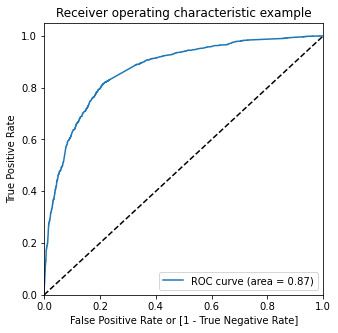

In [122]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

# 🎄 Step 9: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [123]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.894790,7240,1,1,1,1,1,1,1,1,1,1,0
1,1,0.631309,5076,1,1,1,1,1,1,1,1,0,0,0
2,0,0.796430,5160,1,1,1,1,1,1,1,1,1,0,0
3,0,0.030188,873,0,1,0,0,0,0,0,0,0,0,0
4,1,0.890184,6450,1,1,1,1,1,1,1,1,1,1,0


In [124]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375357  1.000000  0.000000
0.1   0.1  0.563288  0.977161  0.314586
0.2   0.2  0.730879  0.907747  0.624596
0.3   0.3  0.796268  0.821317  0.781216
0.4   0.4  0.801143  0.760412  0.825619
0.5   0.5  0.799630  0.673533  0.875404
0.6   0.6  0.794083  0.597850  0.912002
0.7   0.7  0.765171  0.456337  0.950753
0.8   0.8  0.741805  0.364980  0.968245
0.9   0.9  0.689864  0.191223  0.989505


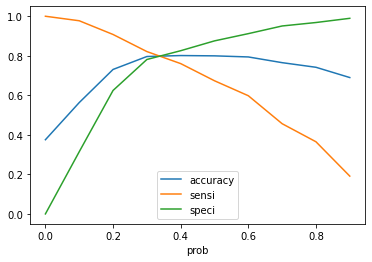

In [125]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### ➡️From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [126]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.894790,7240,1,1,1,1,1,1,1,1,1,1,0,1
1,1,0.631309,5076,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.796430,5160,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.030188,873,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.890184,6450,1,1,1,1,1,1,1,1,1,1,0,1


In [127]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7962682803832577

In [128]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2903,  813],
       [ 399, 1834]], dtype=int64)

In [129]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [130]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8213166144200627

In [131]:
# Let us calculate specificity
TN / float(TN+FP)

0.7812163616792249

In [132]:
# Calculate false postive rate - predicting Converted when customer does not have Converted
print(FP/ float(TN+FP))

0.21878363832077502


In [133]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6928598413298074


In [134]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8791641429436705


# 🎄Step 10: Making predictions on the test set

In [135]:
X_test[['TotalVisits','Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website']])


In [136]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Last Activity_Unreachable,How did you hear about X Education_Email,Last Notable Activity_Email Link Clicked,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
1269,0,-0.873024,0,1,0,0,0,0,0,0,0,1,0,0
1230,0,-0.873024,0,1,0,0,0,1,0,0,0,0,0,0
6489,0,-0.306962,0,0,0,0,1,0,0,0,0,0,0,0
5802,0,-0.873024,0,0,1,0,0,0,0,0,0,1,0,0
4331,0,1.544265,0,0,0,0,0,0,0,0,0,0,0,0


In [137]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [138]:
y_test_pred = res.predict(X_test_sm)

In [139]:
y_test_pred[:15]

1269    0.631309
1230    0.067903
6489    0.071722
5802    0.975141
4331    0.623126
4142    0.119871
3485    0.192115
6028    0.994983
571     0.042123
1606    0.118338
295     0.093433
7886    0.215818
4955    0.911546
1294    0.211138
3508    0.020888
dtype: float64

In [140]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [141]:
# Let's see the head
y_pred_1.head()

,0
1269,0.631309
1230,0.067903
6489,0.071722
5802,0.975141
4331,0.623126


In [142]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [143]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [144]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [145]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [146]:
y_pred_final.head()

,Converted,CustID,0
0,1,1269,0.631309
1,0,1230,0.067903
2,0,6489,0.071722
3,1,5802,0.975141
4,1,4331,0.623126


In [147]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [148]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns = ['CustID','Converted','Converted_Prob'])

In [149]:
y_pred_final.head()

,CustID,Converted,Converted_Prob
0,1269,1,0.631309
1,1230,0,0.067903
2,6489,0,0.071722
3,5802,1,0.975141
4,4331,1,0.623126


In [150]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [151]:
y_pred_final

,CustID,Converted,Converted_Prob,final_predicted
0,1269,1,0.631309,1
1,1230,0,0.067903,0
2,6489,0,0.071722,0
3,5802,1,0.975141,1
4,4331,1,0.623126,1
...,...,...,...,...
2545,218,0,0.136655,0
2546,670,0,0.034024,0
2547,2140,1,0.886824,1
2548,482,1,0.886824,1


In [152]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7949019607843137

In [153]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1289,  263],
       [ 260,  738]], dtype=int64)

In [154]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [155]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7394789579158316

In [156]:
# Let us calculate specificity
TN / float(TN+FP)

0.8305412371134021

#### ➡️Now we got our Predicted result of Train and Test data set. Here we got approximate 80% accurate data 

#                                   😊    Thank You     😊